In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('./data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


- CRIM: 범죄율
- ZN: 25,000 평방피트를 초과 거주지역 비율
- INDUS: 비소매상업지역 면적 비율
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- NOX: 일산화질소 농도
- RM: 주택당 방 수
- AGE: 1940년 이전에 건축된 주택의 비율
- DIS: 직업센터의 거리
- RAD: 방사형 고속도로까지의 거리
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 인구 중 흑인 비율
- LSTAT: 인구 중 하위 계층 비율
- MEDV: 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

In [6]:
del df['CHAS'] # delete categorical variable

### 1. 범죄율이 높은 곳의 집값은 낮을까? 

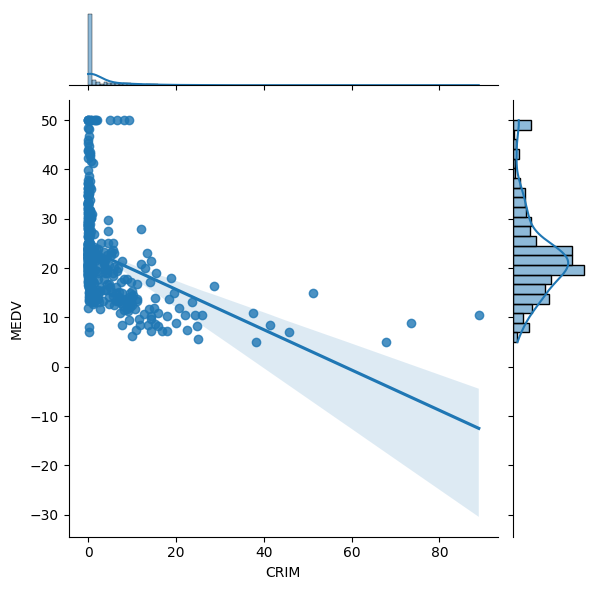

In [10]:
sns.jointplot(data = df, x = "CRIM", y = "MEDV", kind = "reg")

- 범죄율이 높아지면 집값이 낮아지는 음의 상관관계가 있음.

In [11]:
df['CRIM'].cov(df['MEDV']) # check the covariance

-31.073300165678152

In [12]:
df['CRIM'].corr(df['MEDV'])    # 피어슨 상관계수 0.3 ~ 0.6 강한 상관계수

-0.39136301677466323

### 2. 방의 개수가 많은 곳의 집값은 높을까?

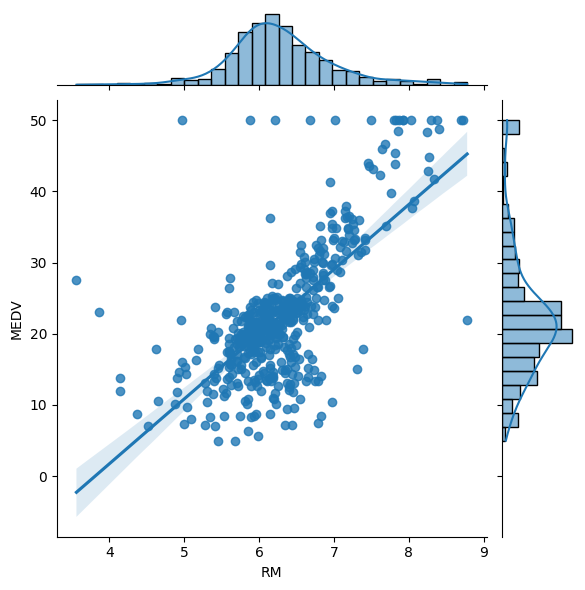

In [13]:
sns.jointplot(data = df, x = "RM", y = "MEDV", kind = "reg")

In [14]:
df['RM'].cov(df['MEDV']) # check the covariance

4.493445879544478

In [18]:
df['RM'].corr(df['MEDV'])    # 피어슨 상관계수 0.6 ~ 0.9 매우 강한 상관계수

0.6953599470715395

### 3. 일산화질소 농도가 높을수록 집값은 낮을까?

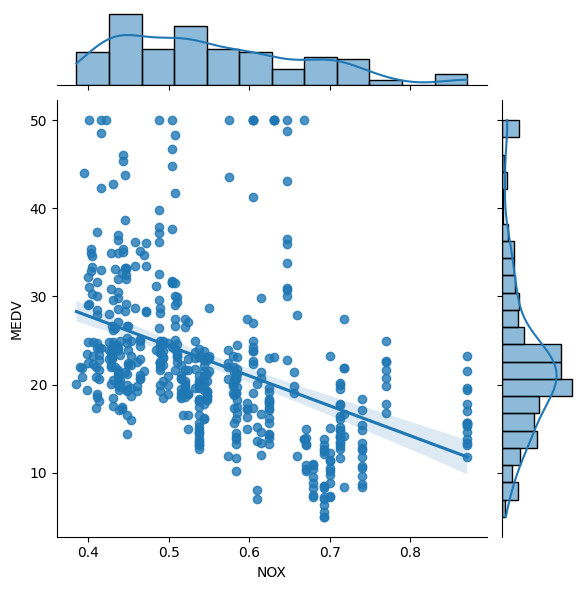

In [16]:
sns.jointplot(data = df, x = "NOX", y = "MEDV", kind="reg")

In [19]:
df['NOX'].corr(df['MEDV'])    # 피어슨 상관계수 -0.3 ~ -0.6 강한 상관계수

-0.42732077237328264

### 4. 재산세율이 높을수록 집값을 높을까?

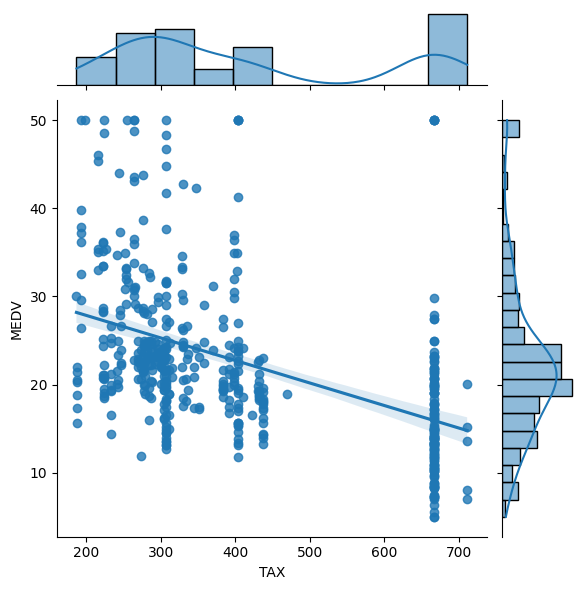

In [20]:
sns.jointplot(data = df, x = "TAX", y = "MEDV", kind="REG")

In [21]:
df['TAX'].corr(df['MEDV'])    # 피어슨 상관계수 -0.3 ~ -0.6 강한 상관계수

-0.468535933567767

### Check the heatmap

<Axes: >

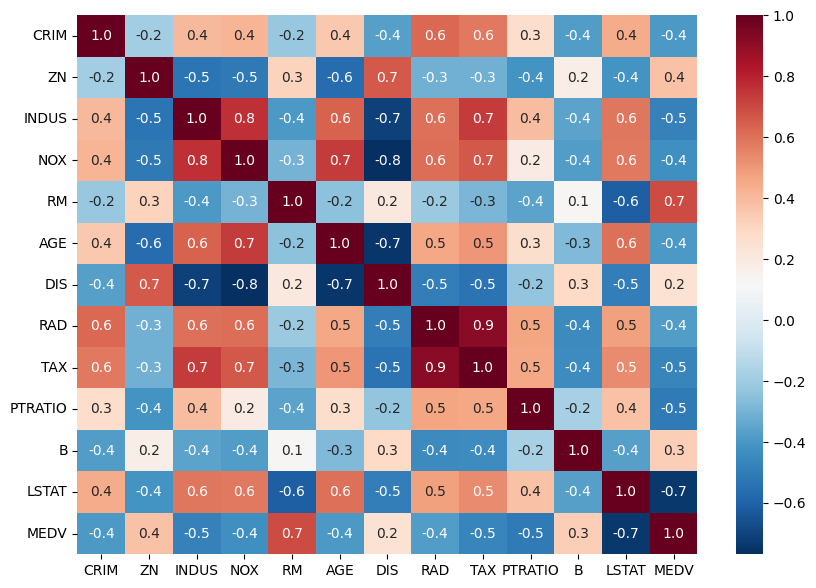

In [22]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), cmap = 'RdBu_r', annot = True, fmt = '0.1f')

In [24]:
corr_bar = []

for column in df.columns:
    print(f"{column}과 집값의 상관관계: {df[column].corr(df['MEDV'])}")
    corr_bar.append(abs(df[column].corr(df['MEDV'])))

CRIM과 집값의 상관관계: -0.39136301677466323
ZN과 집값의 상관관계: 0.3731361297553641
INDUS과 집값의 상관관계: -0.481772101392289
NOX과 집값의 상관관계: -0.42732077237328264
RM과 집값의 상관관계: 0.6953599470715395
AGE과 집값의 상관관계: -0.39465572934562926
DIS과 집값의 상관관계: 0.24992873408590388
RAD과 집값의 상관관계: -0.38162623063977763
TAX과 집값의 상관관계: -0.468535933567767
PTRATIO과 집값의 상관관계: -0.5077866855375617
B과 집값의 상관관계: 0.33346081965706653
LSTAT과 집값의 상관관계: -0.7358220118060533
MEDV과 집값의 상관관계: 1.0


In [25]:
corr_bar

[0.39136301677466323,
 0.3731361297553641,
 0.481772101392289,
 0.42732077237328264,
 0.6953599470715395,
 0.39465572934562926,
 0.24992873408590388,
 0.38162623063977763,
 0.468535933567767,
 0.5077866855375617,
 0.33346081965706653,
 0.7358220118060533,
 1.0]

<Axes: xlabel='None'>

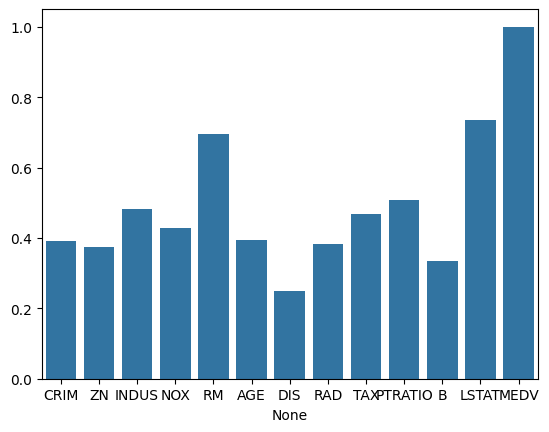

In [27]:
sns.barplot(x = df.columns, y = corr_bar, pallete)

In [29]:
x = df[['DIS', 'B']]

In [30]:
x.head()

,DIS,B
0,4.0900,396.90
1,4.9671,396.90
2,4.9671,392.83
3,6.0622,394.63
4,6.0622,396.90


### PCA

In [31]:
pca = PCA(n_components=1)

In [32]:
pca.fit(x)

PCA(n_components=1)

In [33]:
pca.components_

array([[-0.00672682, -0.99997737]])

In [34]:
pca.explained_variance_ratio_

array([0.9995135])

In [35]:
df['pc1'] = pca.transform(x)

In [47]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,-0.411017
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-0.705842
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,-0.674288
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,-1.056346
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2,-1.073946


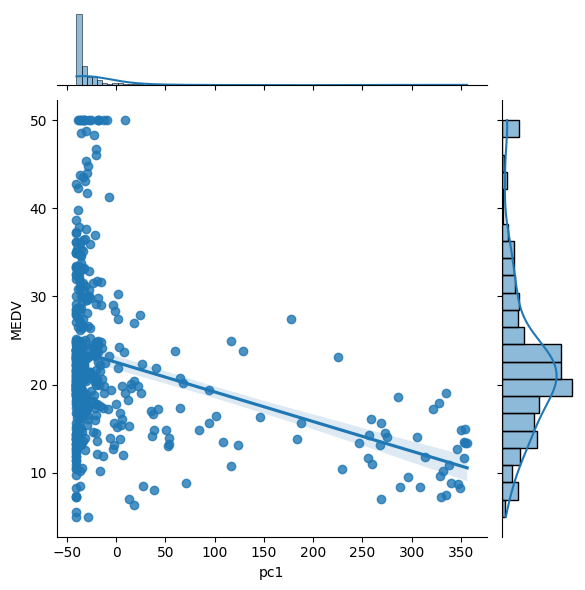

In [37]:
sns.jointplot(data = df, x="pc1", y = "MEDV", kind = "reg")

In [40]:
df['pc1'].corr(df['MEDV'])

-0.3334845106741897

### Normalization

In [41]:
scaler = StandardScaler()
scaler.fit(x)
scaler_x = scaler.transform(x)

In [42]:
scaler_x

array([[ 0.1402136 ,  0.44105193],
       [ 0.55715988,  0.44105193],
       [ 0.55715988,  0.39642699],
       ...,
       [-0.77368357,  0.44105193],
       [-0.66843684,  0.4032249 ],
       [-0.61324648,  0.44105193]])

In [43]:
pca = PCA(n_components=1)

pca.fit(scaler_x)

pca.components_

array([[-0.70710678, -0.70710678]])

In [44]:
pca.explained_variance_ratio_

array([0.64575584])

In [45]:
df['pc1'] = pca.transform(scaler_x)

In [46]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,-0.411017
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-0.705842
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,-0.674288
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,-1.056346
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2,-1.073946


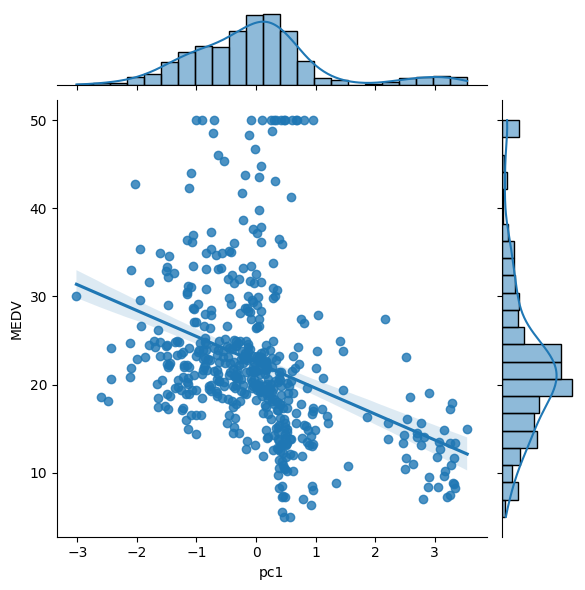

In [48]:
sns.jointplot(data = df, x="pc1", y = "MEDV", kind = "reg")

In [49]:
df['pc1'].corr(df['MEDV'])

-0.36298985100090186

In [51]:
df['B'].corr(df['MEDV'])

0.33346081965706653

### Clustering

In [52]:
medv = df['MEDV']
del df['MEDV']

In [55]:
scaler = StandardScaler()

scaler.fit(df)
scaler_data = scaler.transform(df)